In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
!pip install contextily


     |████████████████████████████████| 19.3 MB 1.4 MB/s 


In [ ]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
color_dict = {'Abgestorben': 'dodgerblue',
 'Absterbend': 'g',
 'Fäule': 'r',
 'Morschung': 'c',
 'Pilzbefall': 'm',
 'Rußrindenkrankheit': 'y',
 'Schrägstand': 'k',
 'Sonst': 'slateblue',
 'Stammschaden': 'lime',
 'Sturmschaden': 'violet',
 "Morschung": "skyblue",
 "Schrägstand": "teal",
 "Komplexerkrankung": "brown",
 "Riss": "olive",
 "Unfallschaden": "bisque",
 "Sachbeschädigung": "plum",
 "Baummaßnahma": "tomato",
 "Trocken": "azure",
 "Pseudomonas": "tan",
 "Lackporling": "hotpink",
 "zu dichter Stand": "orchid",
 "Gefahr": "honeydew",
 "Druckzwiesel": "beige",
 "massiver Rindenschaden": "wheat",
 "Bauwerksschädigung": "red"}

UnboundLocalError: ignored

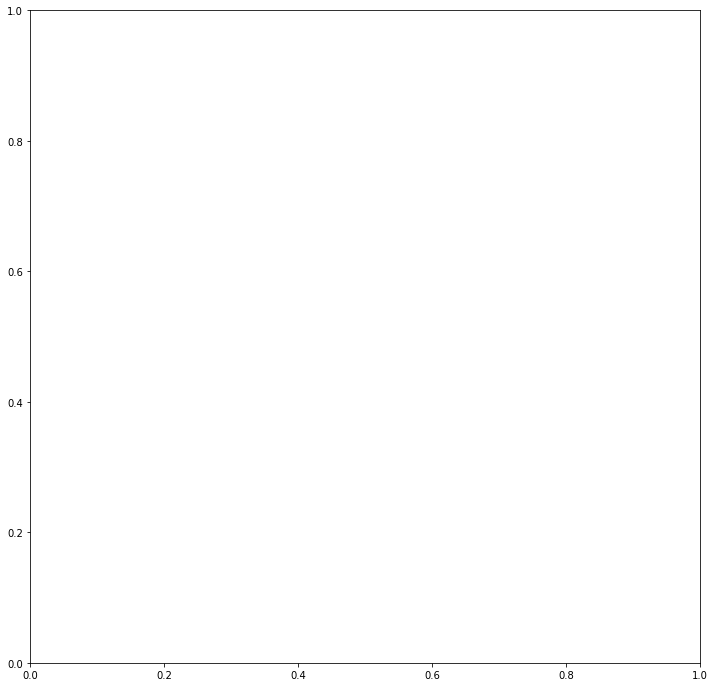

In [ ]:
from pandas.api.types import is_integer_dtype
import contextily as ctx


toilets = gpd.read_file("Standorte öffentlicher Toiletten Düsseldorf 2017_0.geojson.txt")

def plotTrees(season, year, column):
  city_border = gpd.read_file("Stadtgrenze_WGS84_4326.geojson.json")
  trees = gpd.read_file("tree_1.geojson")
  trees = trees.to_crs(city_border.crs)
  trees['dia'] = trees['dia'].fillna(0)
  trees['dia'] = pd.to_numeric(trees['dia'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
  
  # select only the trees that match year and season
  # year_selection = trees[trees.year == year]
  tree_selection = trees[trees.season == season]
  tree_selection = trees
  combine_smallest(tree_selection,'reason', 10, replacement='Sonst')

  f, ax = plt.subplots(1, figsize=(12, 12))
  base.to_crs(epsg=3857)
  base = city_border.plot(ax=ax, color="#f2f2f2")
  trees = tree_selection.plot(ax=base, 
                           markersize=tree_selection['dia'] ,  legend=True, alpha=0.1)
  
  ax = toilets.plot(ax=trees, color="red")
  ax.set_axis_off()
  ctx.add_basemap(ax)
  plt.show()


# f, ax = plt.subplots(1)
# ax = lsoas.plot(axes=ax)
# ax.set_axis_off()
# plt.show()
# so, win




# trees = gpd.read_file("tree_1.geojson")


# DO NOT SELECT WINTER 2019
plotTrees(season="win", year=2018, column="reason")
# plotTrees(season="so", year=2018, column="reason")
# trees

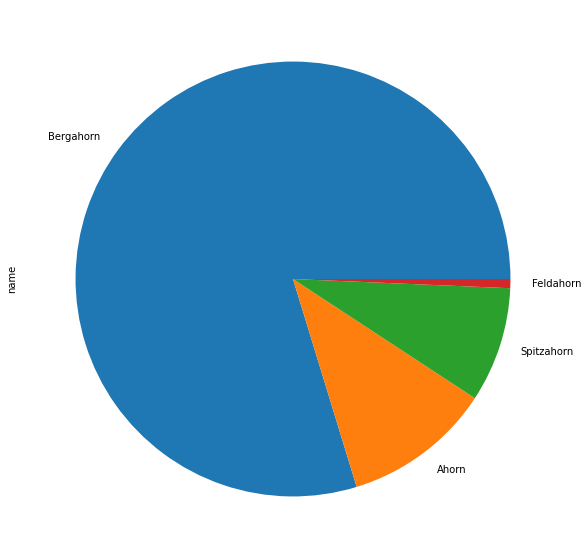

In [ ]:
trees = pd.read_csv("tree_1.csv")
# trees[(trees['year']==2019) & (trees['season'] == 'so')]
# trees = trees.drop(['Absterbend', 'Abgestorben'])
combine_smallest(trees, 'reason', 11)

# df2 = trees.groupby(['year', 'season'])['reason'].value_counts().unstack()
# df2 = trees['reason'].value_counts()

# df2 = df2.drop(['Abgestorben'])

df2 = trees[trees['reason'] == 'Rußrindenkrankheit']
# df2 = df2.drop(['Abgestorben', 'Absterbend'], axis=1)
# df2.plot.pie(stacked=True, figsize=(10,10))
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()
df2['name'].value_counts().head(10).plot.pie(figsize=(10,10))

,Unnamed: 0,lat,lon,reason,name,dia,year,season
509,0,51.21982381,6.7809519929999995,Pilzbefall & Schrägstand,Robinie,107,2019,so
510,1,51.22226858,6.769472148999999,extremer Schrägstand,Robinie,194,2019,so
511,2,51.22647673,6.775827014,abgestorben,Schwedische Mehlbeere,30,2019,so
512,3,51.22655129,6.791883181,Pilzbefall,Schwedische Mehlbeere,90,2019,so
513,4,51.22661516,6.79183658,Pilzbefall,Schwedische Mehlbeere,62,2019,so
...,...,...,...,...,...,...,...,...
1112,603,51.2670982,6.7539502229999995,abgestorben,Ahorn,112,2019,so
1113,604,51.26992028,6.736269206,abgestorben,Feldahorn,90,2019,so
1114,605,51.26745614,6.729733327999999,abgestorben,Götterbaum,155,2019,so
1115,606,51.27209652,6.731154516,90 trockene Bäume,Diverse,80-480,2019,so


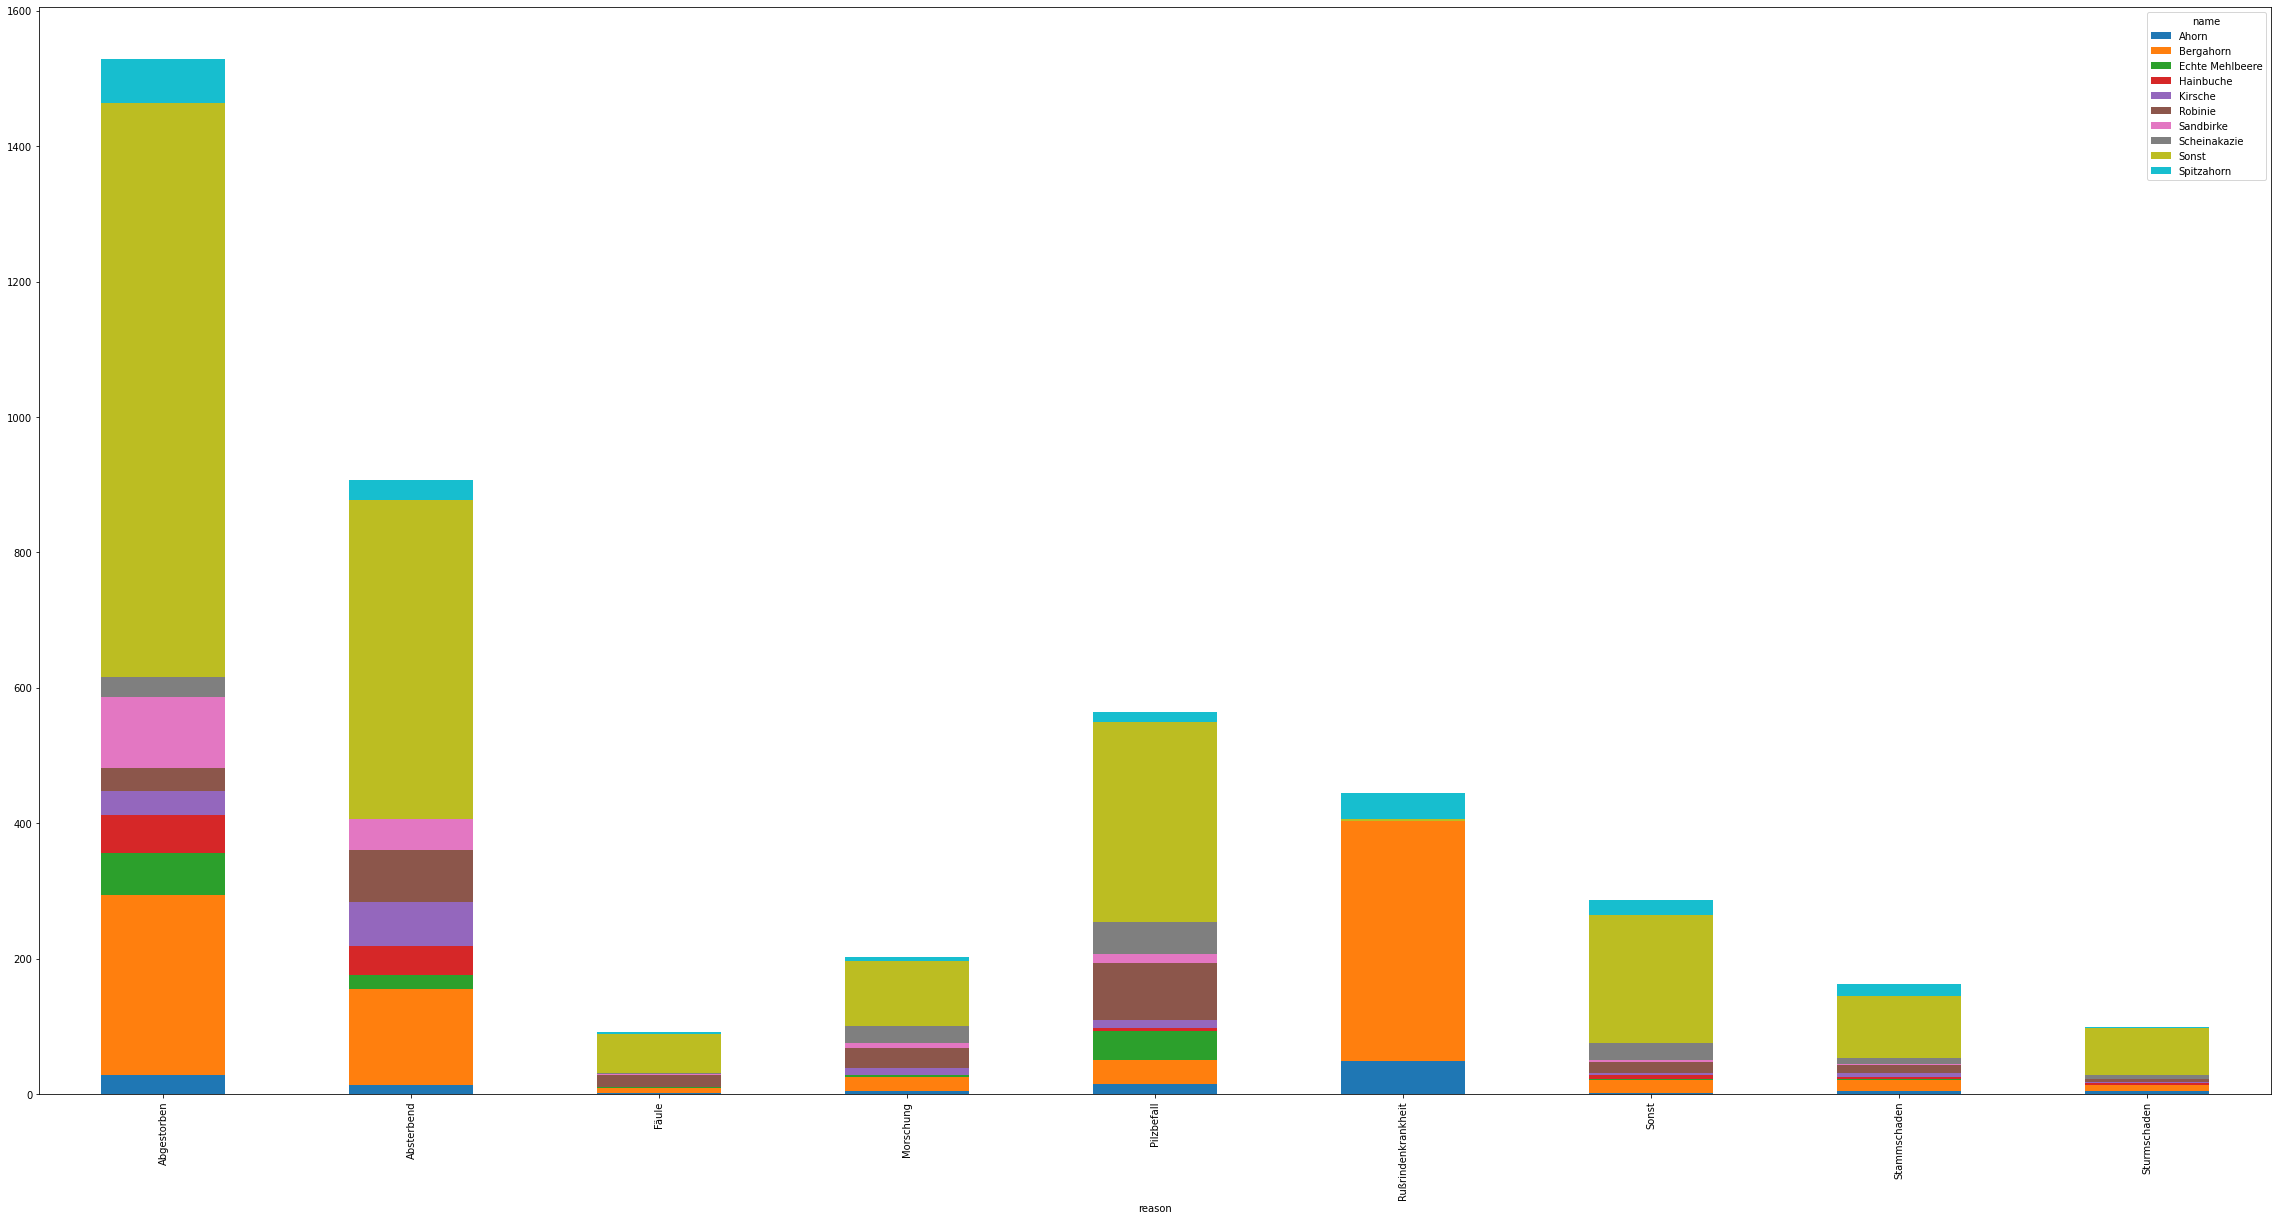

In [ ]:
def filterTrees(df, year, season):
  return df.loc[(df['season'] == season) & (df['year'] == year)]

df = pd.read_csv("tree_1.csv");
# df = filterTrees(df, 2020, "win")
# df.head()

# df.head()

# reasons = df['reason'].unique()
# names = df['name'].unique()
# dictionary = dict.fromkeys(reasons, [])

# for reason in reaasons:
#   for name in names:
#     dictionary[reason].append()
# index
# ax = df['reason'].value_counts().plot.bar(stacked=True, figsize=(40,20))


# df = df.groupby(["name"])
# df.head()

def combine_smallest(df,column, n, replacement="Sonst"):
  most_common = df[column].value_counts().index.tolist()[:n-1]
  df.loc[~df[column].isin(most_common) , column] = replacement

# df.groupby('reason')['name'].value_counts().unstack().fillna(0)


# df2 = df.groupby('reason')['name'].value_counts().unstack().fillna(0)
# df2 = df.groupby('reason')['name'].value_counts().nlargest(20)


# df['name'] = np.where(f(df['name']) , "sheeeesh", df['name'])

combine_smallest(df,column='name', n=10)
combine_smallest(df,column='reason', n=10)

ax = df.groupby('reason')['name'].value_counts().unstack().fillna(0).plot.bar(
    stacked=True,
    # color=[color_dict[key] for key in df['reason']],
    figsize=(40,20))

# df3 = df.groupby('reason')['name'].value_counts().unstack().fillna(0)


# df.groupby('State')['Population'].apply(lambda grp: grp.nlargest(2).sum())
# df3
# df = pd.read_csv("tree_1.csv");
# df.groupby("reason").reason.count().sort_values(ascending=False)
